In [86]:
%%latex
This project will try to get a car to drift in a straight circle.

State:
- Position [$x,y$]
- Velocity [$dx,dy$]
- Acceleration [$d^2 x, d^2 y$]
- Oversteef bool 


grip-model

Friction/grip $F_f = \mu * N$ = $\mu * m * g$ Assuming flat ground



Action:
- Steering angle [$-\frac{2}{3}\pi,\frac{2}{3}\pi$]
- Gas [0,1]


<IPython.core.display.Latex object>

In [105]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [137]:
class Drifter:
    
    def __init__(self):
        self.deltaT = 1
        self.action = (0,0)
        
        
        self.position = np.array((0,0), dtype=np.float64)
        self.velocity = np.array((0,1), dtype=np.float64)
        self.acceleration = np.array((0,0), dtype=np.float64)
        #self.isSliding = False
        
        self.mass = 1 #kg
        #self.mu = .5 #Coefficient of priction
        self.maxDrivingForce = 1
        #self.length = 2 #m between axles
        
        self.alpha_grip = .7 # prop of grip on back wheels 
    
    
    def __vRadial2D__(self,v):
        #print(v)
        
        r =  np.sqrt(np.sum(np.power(v,2)))
        
        if r != 0:
            theta = np.arccos(v[0] / r)
        else:
            theta =  0
        
        
        #print(r, theta)
        return r, theta
   
    def updateState(self):
        r, theta = self.__vRadial2D__(self.velocity)
        
        print(r)
        Fs = r * np.sin(self.action[0])
        print(Fs)
        
        self.acceleration = (self.action[1] / self.mass) * (self.velocity / r)   #(abs acceleration from gas ) * direction of velocity norm
        #print(self.acceleration )   
        self.acceleration += (Fs / self.mass) * np.array([np.cos(self.action[0]), np.sin(self.action[0]) ])
        #print(self.acceleration )
        
        
        self.position += self.velocity * self.deltaT
        self.velocity += self.acceleration * self.deltaT
        


    def updateAction(self):
        
        theta = np.pi/2
        
        gas = 0
        Fd = gas * self.maxDrivingForce
        
        self.action = (theta, Fd)
        
    
    
n = 10

car = Drifter()

state = pd.DataFrame(data=np.zeros((n,4)), columns=["posX", "posY", "Vx", "Vy"])
for i in range(n):
    state.loc[i,:] = [car.position[0],car.position[1],car.velocity[0], car.velocity[1]]
    #print(state[i])
    car.updateAction()
    car.updateState()
    
state["vAbs"] = np.sqrt(state.Vx** 2 + state.Vy**2)
state

1.0
2.0
4.0
8.0
16.0
32.0
64.0
128.0
256.0
512.0


,posX,posY,Vx,Vy,vAbs
0,0.000000e+00,0.0,0.000000e+00,1.0,1.0
1,0.000000e+00,1.0,6.123234e-17,2.0,2.0
2,6.123234e-17,3.0,1.836970e-16,4.0,4.0
3,2.449294e-16,7.0,4.286264e-16,8.0,8.0
4,6.735557e-16,15.0,9.184851e-16,16.0,16.0
5,1.592041e-15,31.0,1.898203e-15,32.0,32.0
6,3.490243e-15,63.0,3.857637e-15,64.0,64.0
7,7.347881e-15,127.0,7.776507e-15,128.0,128.0
8,1.512439e-14,255.0,1.561425e-14,256.0,256.0
9,3.073863e-14,511.0,3.128973e-14,512.0,512.0


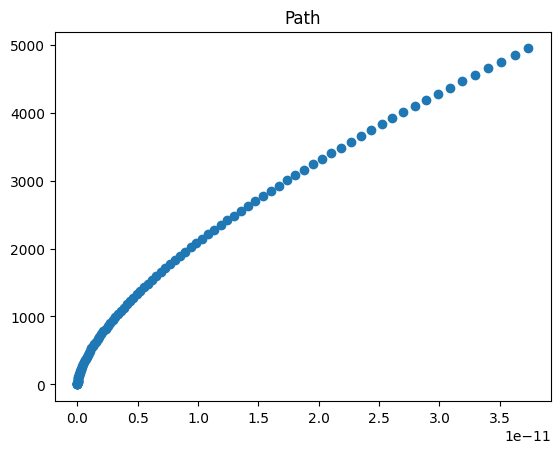

In [126]:
plt.title("Path")
plt.scatter(state.posX, state.posY)
plt.show()

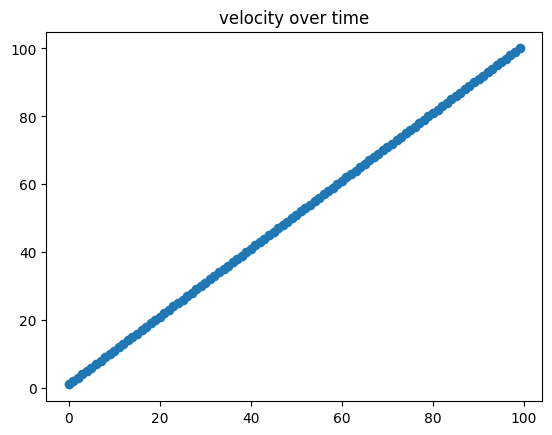

In [131]:

plt.title("velocity over time")
plt.scatter(range(n),state.vAbs)
plt.show()

In [124]:
rows = [s for s in state.iterrows()]

type(rows[1])

tuple